In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

BASE_DIR      = Path(r"C:\Users\islem\Desktop\R37-LightGBM")
RAW_DATA_DIR  = BASE_DIR / "data" / "raw"
PROC_DATA_DIR = BASE_DIR / "data" / "processed"

EDP_PATH   = RAW_DATA_DIR / "edp.csv"
GEOM1_PATH = RAW_DATA_DIR / "geometries_1.npy"
GEOM2_PATH = RAW_DATA_DIR / "geometries_2.npy"

edp = pd.read_csv(EDP_PATH)
g1  = np.load(GEOM1_PATH)
g2  = np.load(GEOM2_PATH)
geometries = np.concatenate([g1, g2], axis=0)

print("EDP shape       :", edp.shape)          # (2000, 53)
print("Geometries shape:", geometries.shape)   # (2000, 2, 9, 112, 4)


EDP shape       : (2000, 53)
Geometries shape: (2000, 2, 9, 112, 4)


In [2]:
design_cols = [c for c in edp.columns if c.startswith("SEGMENT_2")]
perf_cols   = [c for c in edp.columns if c.startswith("computation_pout")]

print("Total columns :", len(edp.columns))
print("Design cols   :", len(design_cols))
print("Perf cols     :", len(perf_cols))

print("\nDesign columns:")
for c in design_cols:
    print(" -", c)

print("\nPerformance columns:")
for c in perf_cols:
    print(" -", c)


Total columns : 53
Design cols   : 36
Perf cols     : 17

Design columns:
 - SEGMENT_2_RTHETA_STACKING_CURVE_POINT1
 - SEGMENT_2_RTHETA_STACKING_CURVE_POINT2
 - SEGMENT_2_RTHETA_STACKING_CURVE_POINT3
 - SEGMENT_2_SECTION1_CHORD
 - SEGMENT_2_SECTION1_EXITANGLE
 - SEGMENT_2_SECTION1_INLETANGLE
 - SEGMENT_2_SECTION1_LEWEDGEANGLE
 - SEGMENT_2_SECTION1_STAGGERANGLE
 - SEGMENT_2_SECTION1_TEWEDGEANGLE
 - SEGMENT_2_SECTION1_THICKNESS_POINT3
 - SEGMENT_2_SECTION1_THICKNESS_POINT4
 - SEGMENT_2_SECTION1_THICKNESS_POINT5
 - SEGMENT_2_SECTION1_THICKNESS_POINT6
 - SEGMENT_2_SECTION2_CHORD
 - SEGMENT_2_SECTION2_EXITANGLE
 - SEGMENT_2_SECTION2_INLETANGLE
 - SEGMENT_2_SECTION2_LEWEDGEANGLE
 - SEGMENT_2_SECTION2_STAGGERANGLE
 - SEGMENT_2_SECTION2_TEWEDGEANGLE
 - SEGMENT_2_SECTION2_THICKNESS_POINT3
 - SEGMENT_2_SECTION2_THICKNESS_POINT4
 - SEGMENT_2_SECTION2_THICKNESS_POINT5
 - SEGMENT_2_SECTION2_THICKNESS_POINT6
 - SEGMENT_2_SECTION3_CHORD
 - SEGMENT_2_SECTION3_EXITANGLE
 - SEGMENT_2_SECTION3_INLETANGLE

In [3]:
desc_design = edp[design_cols].describe().T
desc_perf   = edp[perf_cols].describe().T

print("=== DESIGN STATS ===")
display(desc_design[["mean", "std", "min", "25%", "50%", "75%", "max"]])

print("=== PERFORMANCE STATS ===")
display(desc_perf[["mean", "std", "min", "25%", "50%", "75%", "max"]])


=== DESIGN STATS ===


,mean,std,min,25%,50%,75%,max
SEGMENT_2_RTHETA_STACKING_CURVE_POINT1,-0.001000,0.000578,-0.002000,-0.001499,-0.000999,-0.000499,0.000000e+00
SEGMENT_2_RTHETA_STACKING_CURVE_POINT2,-0.001000,0.000577,-0.002000,-0.001500,-0.001000,-0.000500,-6.722403e-07
SEGMENT_2_RTHETA_STACKING_CURVE_POINT3,-0.001000,0.000577,-0.002000,-0.001500,-0.001000,-0.000501,-9.878466e-07
SEGMENT_2_SECTION1_CHORD,0.055001,0.002887,0.050005,0.052502,0.055003,0.057498,5.999873e-02
SEGMENT_2_SECTION1_EXITANGLE,-16.840000,2.886711,-21.836559,-19.338247,-16.840192,-14.343291,-1.184014e+01
SEGMENT_2_SECTION1_INLETANGLE,-54.599995,2.886789,-59.596835,-57.097974,-54.600449,-52.100980,-4.960245e+01
SEGMENT_2_SECTION1_LEWEDGEANGLE,5.001536,2.887517,0.001239,2.503732,5.003620,7.503173,9.997554e+00
SEGMENT_2_SECTION1_STAGGERANGLE,-38.999993,1.154734,-40.998293,-39.999488,-38.999882,-38.000977,-3.700174e+01
SEGMENT_2_SECTION1_TEWEDGEANGLE,12.000037,2.886742,7.003191,9.502409,12.000414,14.499184,1.699728e+01
SEGMENT_2_SECTION1_THICKNESS_POINT3,0.003518,0.000577,0.002519,0.003018,0.003518,0.004017,4.517007e-03


=== PERFORMANCE STATS ===


,mean,std,min,25%,50%,75%,max
computation_pout_C_ISEN_EFF_TOT2TOT,0.830579,0.017347,0.734012,0.819630,0.832023,0.843695,0.869932
computation_pout_C_ISEN_EFF_TOT2STA,-0.144901,0.006533,-0.165300,-0.149584,-0.144427,-0.139925,-0.126971
computation_pout_C_ISEN_EFF_STA2STA,0.303373,0.062370,0.069308,0.259242,0.306650,0.352568,0.449380
computation_pout_C_POLY_EFF_TOT2TOT,0.844969,0.016258,0.752090,0.834804,0.846569,0.857325,0.881741
computation_pout_C_POLY_EFF_TOT2STA,-0.164507,0.006706,-0.185440,-0.169337,-0.164027,-0.159394,-0.146107
computation_pout_C_POLY_EFF_STA2STA,0.308636,0.063034,0.071012,0.263872,0.312242,0.358565,0.455540
computation_pout_C_EFF_ENTROPY,0.827712,0.017931,0.727666,0.816392,0.829184,0.841231,0.868230
computation_pout_MASS_FLOW,20.422390,0.480107,18.451000,20.093750,20.458000,20.781250,21.489000
computation_pout_TORQUE,792.203295,47.724941,625.710000,758.410000,792.795000,826.762500,935.620000
computation_pout_C_PRES_LOSS,-5.460630,0.193280,-6.168654,-5.593078,-5.448107,-5.320932,-4.973868


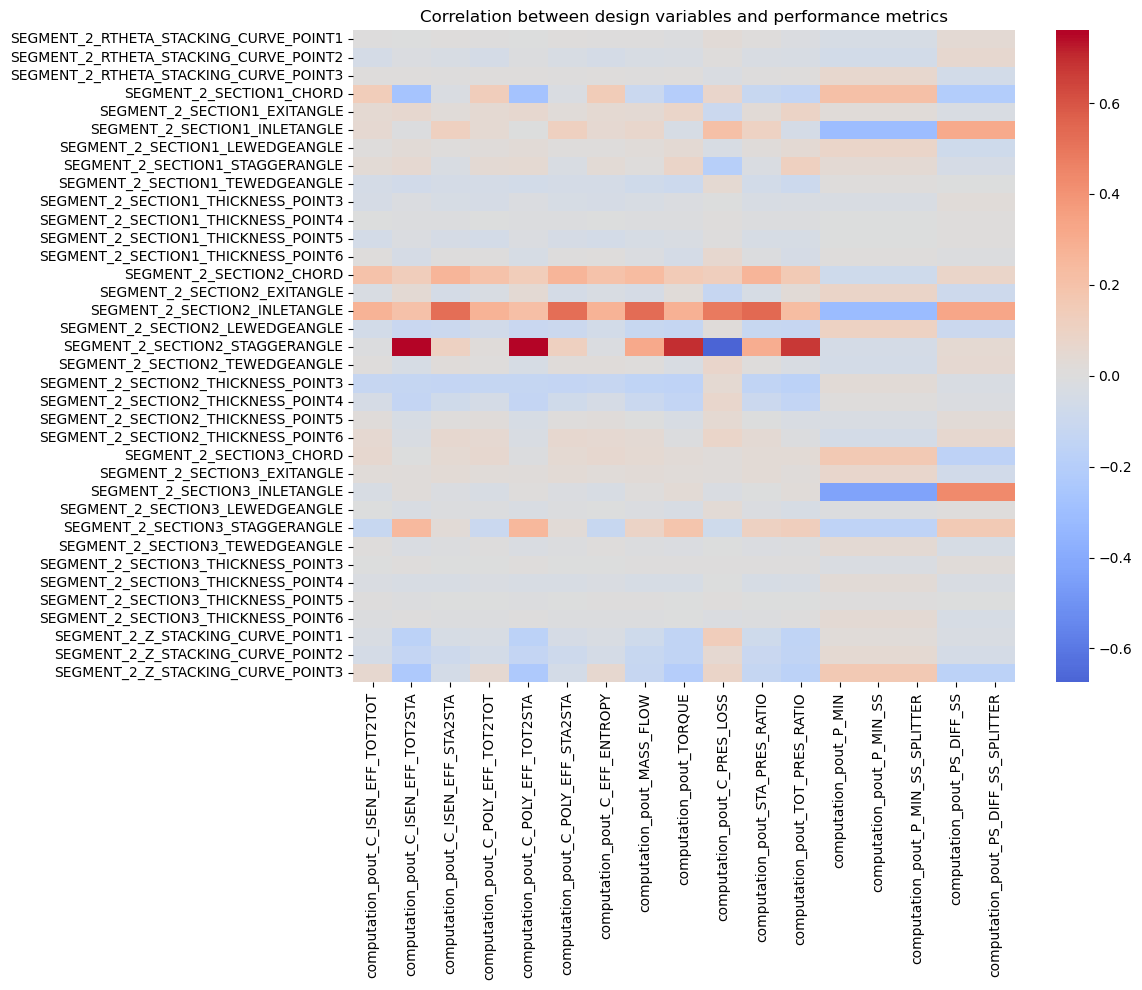

In [4]:
# مصفوفة ارتباط كاملة
corr = edp[design_cols + perf_cols].corr(numeric_only=True)

# نركّز على ارتباط design -> performance
corr_dp = corr.loc[design_cols, perf_cols]

plt.figure(figsize=(12, 10))
sns.heatmap(corr_dp, cmap="coolwarm", center=0)
plt.title("Correlation between design variables and performance metrics")
plt.tight_layout()
plt.show()


In [5]:
def top_correlations(corr_dp, target, k=5):
    s = corr_dp[target].abs().sort_values(ascending=False)
    return s.head(k)

for t in perf_cols:
    print(f"\n=== Top design correlations for {t} ===")
    display(top_correlations(corr_dp, t, k=7))



=== Top design correlations for computation_pout_C_ISEN_EFF_TOT2TOT ===


SEGMENT_2_SECTION2_INLETANGLE          0.275789
SEGMENT_2_SECTION2_CHORD               0.198580
SEGMENT_2_SECTION1_CHORD               0.142778
SEGMENT_2_SECTION2_THICKNESS_POINT3    0.124617
SEGMENT_2_SECTION3_STAGGERANGLE        0.115522
SEGMENT_2_SECTION2_LEWEDGEANGLE        0.063054
SEGMENT_2_Z_STACKING_CURVE_POINT3      0.057775
Name: computation_pout_C_ISEN_EFF_TOT2TOT, dtype: float64


=== Top design correlations for computation_pout_C_ISEN_EFF_TOT2STA ===


SEGMENT_2_SECTION2_STAGGERANGLE        0.760110
SEGMENT_2_SECTION1_CHORD               0.267482
SEGMENT_2_SECTION3_STAGGERANGLE        0.247751
SEGMENT_2_Z_STACKING_CURVE_POINT3      0.235685
SEGMENT_2_SECTION2_INLETANGLE          0.203147
SEGMENT_2_Z_STACKING_CURVE_POINT1      0.164943
SEGMENT_2_SECTION2_THICKNESS_POINT4    0.135396
Name: computation_pout_C_ISEN_EFF_TOT2STA, dtype: float64


=== Top design correlations for computation_pout_C_ISEN_EFF_STA2STA ===


SEGMENT_2_SECTION2_INLETANGLE          0.520618
SEGMENT_2_SECTION2_CHORD               0.262311
SEGMENT_2_SECTION2_THICKNESS_POINT3    0.133078
SEGMENT_2_SECTION1_INLETANGLE          0.111950
SEGMENT_2_SECTION2_STAGGERANGLE        0.108672
SEGMENT_2_SECTION2_LEWEDGEANGLE        0.096566
SEGMENT_2_Z_STACKING_CURVE_POINT2      0.085593
Name: computation_pout_C_ISEN_EFF_STA2STA, dtype: float64


=== Top design correlations for computation_pout_C_POLY_EFF_TOT2TOT ===


SEGMENT_2_SECTION2_INLETANGLE          0.278040
SEGMENT_2_SECTION2_CHORD               0.199349
SEGMENT_2_SECTION1_CHORD               0.133883
SEGMENT_2_SECTION2_THICKNESS_POINT3    0.128490
SEGMENT_2_SECTION3_STAGGERANGLE        0.107699
SEGMENT_2_SECTION2_LEWEDGEANGLE        0.066298
SEGMENT_2_SECTION3_CHORD               0.055777
Name: computation_pout_C_POLY_EFF_TOT2TOT, dtype: float64


=== Top design correlations for computation_pout_C_POLY_EFF_TOT2STA ===


SEGMENT_2_SECTION2_STAGGERANGLE      0.755160
SEGMENT_2_SECTION1_CHORD             0.271295
SEGMENT_2_SECTION3_STAGGERANGLE      0.252062
SEGMENT_2_Z_STACKING_CURVE_POINT3    0.237064
SEGMENT_2_SECTION2_INLETANGLE        0.211881
SEGMENT_2_Z_STACKING_CURVE_POINT1    0.165036
SEGMENT_2_SECTION2_CHORD             0.141244
Name: computation_pout_C_POLY_EFF_TOT2STA, dtype: float64


=== Top design correlations for computation_pout_C_POLY_EFF_STA2STA ===


SEGMENT_2_SECTION2_INLETANGLE          0.521565
SEGMENT_2_SECTION2_CHORD               0.262253
SEGMENT_2_SECTION2_THICKNESS_POINT3    0.133425
SEGMENT_2_SECTION2_STAGGERANGLE        0.112312
SEGMENT_2_SECTION1_INLETANGLE          0.111810
SEGMENT_2_SECTION2_LEWEDGEANGLE        0.096997
SEGMENT_2_Z_STACKING_CURVE_POINT2      0.086199
Name: computation_pout_C_POLY_EFF_STA2STA, dtype: float64


=== Top design correlations for computation_pout_C_EFF_ENTROPY ===


SEGMENT_2_SECTION2_INLETANGLE          0.274665
SEGMENT_2_SECTION2_CHORD               0.197912
SEGMENT_2_SECTION1_CHORD               0.144253
SEGMENT_2_SECTION2_THICKNESS_POINT3    0.123900
SEGMENT_2_SECTION3_STAGGERANGLE        0.116838
SEGMENT_2_SECTION2_LEWEDGEANGLE        0.062457
SEGMENT_2_Z_STACKING_CURVE_POINT3      0.059081
Name: computation_pout_C_EFF_ENTROPY, dtype: float64


=== Top design correlations for computation_pout_MASS_FLOW ===


SEGMENT_2_SECTION2_INLETANGLE          0.528370
SEGMENT_2_SECTION2_STAGGERANGLE        0.313030
SEGMENT_2_SECTION2_CHORD               0.237456
SEGMENT_2_SECTION2_THICKNESS_POINT3    0.151761
SEGMENT_2_Z_STACKING_CURVE_POINT3      0.125145
SEGMENT_2_SECTION2_LEWEDGEANGLE        0.119534
SEGMENT_2_Z_STACKING_CURVE_POINT2      0.119105
Name: computation_pout_MASS_FLOW, dtype: float64


=== Top design correlations for computation_pout_TORQUE ===


SEGMENT_2_SECTION2_STAGGERANGLE        0.695242
SEGMENT_2_SECTION2_INLETANGLE          0.282666
SEGMENT_2_Z_STACKING_CURVE_POINT3      0.209452
SEGMENT_2_SECTION1_CHORD               0.208525
SEGMENT_2_SECTION3_STAGGERANGLE        0.185182
SEGMENT_2_SECTION2_THICKNESS_POINT3    0.157558
SEGMENT_2_SECTION2_CHORD               0.151714
Name: computation_pout_TORQUE, dtype: float64


=== Top design correlations for computation_pout_C_PRES_LOSS ===


SEGMENT_2_SECTION2_STAGGERANGLE      0.674767
SEGMENT_2_SECTION2_INLETANGLE        0.490286
SEGMENT_2_SECTION1_INLETANGLE        0.210115
SEGMENT_2_SECTION1_STAGGERANGLE      0.188828
SEGMENT_2_Z_STACKING_CURVE_POINT1    0.136456
SEGMENT_2_SECTION2_CHORD             0.129417
SEGMENT_2_SECTION2_EXITANGLE         0.124047
Name: computation_pout_C_PRES_LOSS, dtype: float64


=== Top design correlations for computation_pout_STA_PRES_RATIO ===


SEGMENT_2_SECTION2_INLETANGLE          0.546255
SEGMENT_2_SECTION2_STAGGERANGLE        0.299457
SEGMENT_2_SECTION2_CHORD               0.262035
SEGMENT_2_SECTION2_THICKNESS_POINT3    0.143275
SEGMENT_2_Z_STACKING_CURVE_POINT3      0.127945
SEGMENT_2_SECTION1_CHORD               0.118290
SEGMENT_2_SECTION2_LEWEDGEANGLE        0.116552
Name: computation_pout_STA_PRES_RATIO, dtype: float64


=== Top design correlations for computation_pout_TOT_PRES_RATIO ===


SEGMENT_2_SECTION2_STAGGERANGLE        0.672494
SEGMENT_2_SECTION2_INLETANGLE          0.229370
SEGMENT_2_SECTION2_THICKNESS_POINT3    0.168479
SEGMENT_2_Z_STACKING_CURVE_POINT3      0.166662
SEGMENT_2_SECTION2_CHORD               0.156959
SEGMENT_2_Z_STACKING_CURVE_POINT1      0.148200
SEGMENT_2_Z_STACKING_CURVE_POINT2      0.142582
Name: computation_pout_TOT_PRES_RATIO, dtype: float64


=== Top design correlations for computation_pout_P_MIN ===


SEGMENT_2_SECTION3_INLETANGLE        0.439074
SEGMENT_2_SECTION2_INLETANGLE        0.317096
SEGMENT_2_SECTION1_INLETANGLE        0.305705
SEGMENT_2_SECTION1_CHORD             0.207311
SEGMENT_2_Z_STACKING_CURVE_POINT3    0.163991
SEGMENT_2_SECTION3_CHORD             0.163582
SEGMENT_2_SECTION3_STAGGERANGLE      0.156366
Name: computation_pout_P_MIN, dtype: float64


=== Top design correlations for computation_pout_P_MIN_SS ===


SEGMENT_2_SECTION3_INLETANGLE        0.439079
SEGMENT_2_SECTION2_INLETANGLE        0.317141
SEGMENT_2_SECTION1_INLETANGLE        0.305724
SEGMENT_2_SECTION1_CHORD             0.207251
SEGMENT_2_Z_STACKING_CURVE_POINT3    0.163992
SEGMENT_2_SECTION3_CHORD             0.163557
SEGMENT_2_SECTION3_STAGGERANGLE      0.156352
Name: computation_pout_P_MIN_SS, dtype: float64


=== Top design correlations for computation_pout_P_MIN_SS_SPLITTER ===


SEGMENT_2_SECTION3_INLETANGLE        0.439074
SEGMENT_2_SECTION2_INLETANGLE        0.317096
SEGMENT_2_SECTION1_INLETANGLE        0.305705
SEGMENT_2_SECTION1_CHORD             0.207311
SEGMENT_2_Z_STACKING_CURVE_POINT3    0.163991
SEGMENT_2_SECTION3_CHORD             0.163582
SEGMENT_2_SECTION3_STAGGERANGLE      0.156366
Name: computation_pout_P_MIN_SS_SPLITTER, dtype: float64


=== Top design correlations for computation_pout_PS_DIFF_SS ===


SEGMENT_2_SECTION3_INLETANGLE        0.432750
SEGMENT_2_SECTION2_INLETANGLE        0.327117
SEGMENT_2_SECTION1_INLETANGLE        0.310866
SEGMENT_2_SECTION1_CHORD             0.209578
SEGMENT_2_Z_STACKING_CURVE_POINT3    0.164888
SEGMENT_2_SECTION3_CHORD             0.163564
SEGMENT_2_SECTION3_STAGGERANGLE      0.159417
Name: computation_pout_PS_DIFF_SS, dtype: float64


=== Top design correlations for computation_pout_PS_DIFF_SS_SPLITTER ===


SEGMENT_2_SECTION3_INLETANGLE        0.432744
SEGMENT_2_SECTION2_INLETANGLE        0.327074
SEGMENT_2_SECTION1_INLETANGLE        0.310849
SEGMENT_2_SECTION1_CHORD             0.209638
SEGMENT_2_Z_STACKING_CURVE_POINT3    0.164887
SEGMENT_2_SECTION3_CHORD             0.163588
SEGMENT_2_SECTION3_STAGGERANGLE      0.159432
Name: computation_pout_PS_DIFF_SS_SPLITTER, dtype: float64

In [6]:
N, sides, n_span, n_pts, n_feat = geometries.shape
print(f"N={N}, sides={sides}, n_span={n_span}, n_pts={n_pts}, n_feat={n_feat}")

SAMPLE_INDEX = 0

suction  = geometries[SAMPLE_INDEX, 0, :, :, :3]  # (9,112,3)
pressure = geometries[SAMPLE_INDEX, 1, :, :, :3]

print("Suction shape :", suction.shape)
print("Pressure shape:", pressure.shape)


N=2000, sides=2, n_span=9, n_pts=112, n_feat=4
Suction shape : (9, 112, 3)
Pressure shape: (9, 112, 3)


Geom chord mean : 0.0012687967712879504
EDP  chord mean : 0.055000169146726875


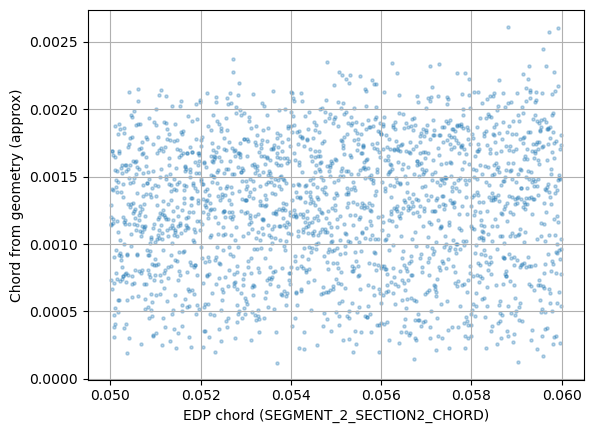

In [9]:
# دالة: حساب طول chord من مقطع (سحب + ضغط)
def chord_length_from_geom(suct_curve, press_curve):
    """
    suct_curve, press_curve: (n_pts, 3)
    نحسب chord كأقصى فرق في الإحداثي x على الكيرف المتوسط.
    """
    mid_curve = 0.5 * (suct_curve + press_curve)   # (n_pts,3)
    x = mid_curve[:, 0]
    return float(x.max() - x.min())

N, _, n_span, n_pts, _ = geometries.shape
mid_idx = n_span // 2

chords_geom = []
for i in range(N):
    suct_mid  = geometries[i, 0, mid_idx, :, :3]  # (112,3)
    press_mid = geometries[i, 1, mid_idx, :, :3]  # (112,3)
    c = chord_length_from_geom(suct_mid, press_mid)
    chords_geom.append(c)

chords_geom = np.array(chords_geom)

edp_chord_mid = edp["SEGMENT_2_SECTION2_CHORD"].values

print("Geom chord mean :", chords_geom.mean())
print("EDP  chord mean :", edp_chord_mid.mean())

plt.scatter(edp_chord_mid, chords_geom, s=5, alpha=0.3)
plt.xlabel("EDP chord (SEGMENT_2_SECTION2_CHORD)")
plt.ylabel("Chord from geometry (approx)")
plt.grid(True)
plt.show()


In [8]:
import json

feature_cols = design_cols           # في هذه المرحلة كل تصميم SEGMENT_2
target_cols  = perf_cols             # كل performance المتاحة

config = {
    "feature_cols": feature_cols,
    "target_cols": target_cols,
}

CONFIG_PATH = PROC_DATA_DIR / "features_targets_full.json"
with open(CONFIG_PATH, "w") as f:
    json.dump(config, f, indent=2)

print("Saved full feature/target lists to:", CONFIG_PATH)


Saved full feature/target lists to: C:\Users\islem\Desktop\R37-LightGBM\data\processed\features_targets_full.json
